<a href="https://colab.research.google.com/github/Springboard429/LingualSense_Infosys_Internship_Oct2024/blob/Radhika/LingualSense_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
print("Imports successful!")


Imports successful!


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving merged_dataset.csv to merged_dataset (2).csv


In [ ]:
# Load the dataset
df = pd.read_csv('merged_dataset.csv')

# Clean the Text column
df['Text'] = df['Text'].fillna('No Text Available')
df = df.assign(Text=df['Text'].fillna('No Text Available'))

# Label Encoding for the target variable
le = LabelEncoder()
df['Language_encoded'] = le.fit_transform(df['Language'])

# Check the processed dataset
print(df.head())

                                                Text  Language  \
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian   
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish   
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai   
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil   
4  de spons behoort tot het geslacht haliclona en...     Dutch   

   Language_encoded  
0                 5  
1                24  
2                27  
3                26  
4                 3  


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the Tokenizer
max_words = 10000  # Maximum number of unique tokens to keep
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Text'])  # Fit tokenizer on the text column

# Convert text into sequences
sequences = tokenizer.texts_to_sequences(df['Text'])

# Pad the sequences to ensure equal length
max_seq_length = 50  # You can adjust based on your dataset
X_padded = pad_sequences(sequences, maxlen=max_seq_length, padding='post', truncating='post')

# Print the tokenized and padded sequences
print("Sample sequence:", sequences[0])
print("Padded sequence:", X_padded[0])


Sample sequence: [1, 1, 1, 1, 357, 1, 1, 1, 296, 1573, 1, 1, 76, 1, 1, 357, 1, 1, 1, 1, 369, 1, 239, 1, 1, 6773, 76, 1, 1, 8947, 1, 2641, 92, 4419, 1, 1, 1, 1, 1, 1, 8947, 2641, 92, 4419, 1]
Padded sequence: [   1    1    1    1  357    1    1    1  296 1573    1    1   76    1
    1  357    1    1    1    1  369    1  239    1    1 6773   76    1
    1 8947    1 2641   92 4419    1    1    1    1    1    1 8947 2641
   92 4419    1    0    0    0    0    0]


In [ ]:
from sklearn.model_selection import train_test_split

# Features (padded sequences) and target (encoded labels)
X = X_padded
y = df['Language_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (25869, 50)
Testing set size: (6468, 50)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

# Define the parameters (adjust according to your data)
vocab_size = 5000  # Vocabulary size
embedding_dim = 100  # Embedding dimension
max_sequence_length = 100  # Max sequence length
num_classes = 30  # Number of output classes (your unique target labels)

# Define the model
model = Sequential()

# Embedding Layer (specifying input_dim and input_length explicitly)
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))

# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(64, return_sequences=True)))

# Dropout Layer
model.add(Dropout(0.5))

# Another Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(64)))

# Dropout Layer
model.add(Dropout(0.5))

# Dense Layer (Hidden layer)
model.add(Dense(128, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Show the model summary
model.build(input_shape=(None, max_sequence_length))  # Build the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 100, 128)            │          84,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 703,678 (2.68 MB)

 Trainable params: 703,678 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
# Set vocab size based on the tokenizer's vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for padding index (optional)
print("Vocabulary Size:", vocab_size)

# Define the Embedding layer with correct vocab size
embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=128,  # You can set a different output dimension
                            input_length=max_sequence_length)

# Build the model with the correct embedding layer
model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_test, y_test))


Vocabulary Size: 303606
Epoch 1/5
809/809 ━━━━━━━━━━━━━━━━━━━━ 616s 747ms/step - accuracy: 0.2033 - loss: 2.6921 - val_accuracy: 0.7449 - val_loss: 0.8533
Epoch 2/5
809/809 ━━━━━━━━━━━━━━━━━━━━ 594s 734ms/step - accuracy: 0.6990 - loss: 0.9630 - val_accuracy: 0.8536 - val_loss: 0.4767
Epoch 3/5
809/809 ━━━━━━━━━━━━━━━━━━━━ 605s 747ms/step - accuracy: 0.8006 - loss: 0.6220 - val_accuracy: 0.9009 - val_loss: 0.3801
Epoch 4/5
809/809 ━━━━━━━━━━━━━━━━━━━━ 598s 740ms/step - accuracy: 0.8534 - loss: 0.4867 - val_accuracy: 0.9091 - val_loss: 0.3494
Epoch 5/5
809/809 ━━━━━━━━━━━━━━━━━━━━ 617s 733ms/step - accuracy: 0.8878 - loss: 0.3910 - val_accuracy: 0.9088 - val_loss: 0.3491


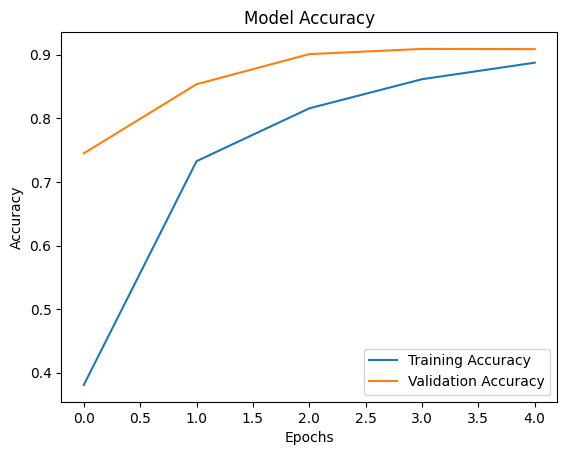

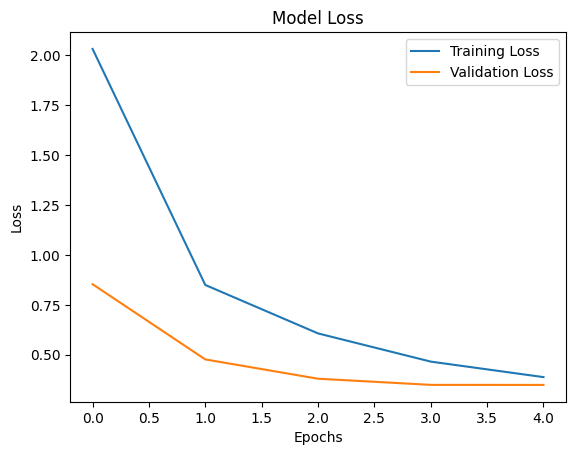

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate model accuracy on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9041 - loss: 0.3601
Test Accuracy: 90.88%


In [ ]:
# Check all unique labels in the test set
unique_labels = set(y_test)
print("Unique labels in y_test:", unique_labels)


Unique labels in y_test: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}


In [ ]:
# Update language mapping with actual language names
language_mapping = {
    0: 'Arabic',
    1: 'Bengali',
    2: 'Chinese',
    3: 'Czech',
    4: 'Danish',
    5: 'Dutch',
    6: 'English',
    7: 'Finnish',
    8: 'French',
    9: 'German',
    10: 'Greek',
    11: 'Hebrew',
    12: 'Hindi',
    13: 'Hungarian',
    14: 'Italian',
    15: 'Japanese',
    16: 'Korean',
    17: 'Malay',
    18: 'Norwegian',
    19: 'Polish',
    20: 'Portuguese',
    21: 'Romanian',
    22: 'Russian',
    23: 'Spanish',
    24: 'Swedish',
    25: 'Tamil',
    26: 'Thai',
    27: 'Turkish',
    28: 'Urdu',
    29: 'Vietnamese'
}

# You can print the mapping for verification
print(language_mapping)


{0: 'Arabic', 1: 'Bengali', 2: 'Chinese', 3: 'Czech', 4: 'Danish', 5: 'Dutch', 6: 'English', 7: 'Finnish', 8: 'French', 9: 'German', 10: 'Greek', 11: 'Hebrew', 12: 'Hindi', 13: 'Hungarian', 14: 'Italian', 15: 'Japanese', 16: 'Korean', 17: 'Malay', 18: 'Norwegian', 19: 'Polish', 20: 'Portuguese', 21: 'Romanian', 22: 'Russian', 23: 'Spanish', 24: 'Swedish', 25: 'Tamil', 26: 'Thai', 27: 'Turkish', 28: 'Urdu', 29: 'Vietnamese'}


In [ ]:
y_test_languages = [language_mapping[label] for label in y_test]
predicted_languages = [language_mapping[np.argmax(pred)] for pred in model.predict(X_test)]


203/203 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


203/203 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9041 - loss: 0.3601
Test Loss: 0.3490791618824005, Test Accuracy: 0.9087817072868347


In [ ]:
y_test_languages = [language_mapping[label] for label in y_test]
predicted_languages = [language_mapping[np.argmax(pred)] for pred in model.predict(X_test)]

from sklearn.metrics import classification_report
print(classification_report(y_test_languages, predicted_languages))


203/203 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step
              precision    recall  f1-score   support

      Arabic       1.00      0.96      0.98       291
     Bengali       0.14      0.00      0.01       205
     Chinese       0.94      0.85      0.89        71
       Czech       0.99      0.96      0.97       318
      Danish       0.96      0.94      0.95       482
       Dutch       0.93      0.96      0.94       193
     English       0.95      0.97      0.96       414
     Finnish       0.95      0.95      0.95       105
      French       1.00      0.85      0.92        72
      German       0.99      1.00      0.99       216
       Greek       1.00      0.98      0.99       214
      Hebrew       0.96      0.91      0.93       142
       Hindi       0.33      0.78      0.46       184
   Hungarian       0.94      0.85      0.89        74
     Italian       0.98      0.98      0.98       171
    Japanese       0.90      0.96      0.93       226
      Korean       0.61      0.85      

In [ ]:
model.save("language_detection_model.h5")


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("language_detection_model.h5")


In [ ]:
sample_text = ["你好", "こんにちは", "안녕하세요","Window"]
sample_sequences = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_sequences, maxlen=max_sequence_length, padding='post')
predictions = model.predict(sample_padded)
for i, text in enumerate(sample_text):
    print(f"Text: {text} -> Predicted Language: {language_mapping[np.argmax(predictions[i])]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Text: 你好 -> Predicted Language: Hindi
Text: こんにちは -> Predicted Language: Hindi
Text: 안녕하세요 -> Predicted Language: Hindi
Text: Window -> Predicted Language: Hindi
